In [75]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [80]:
# 1

def analytic(x):
    return np.pow(x, 3) / 3 + 1

def f(x, y):
    return x**2

def euler(n=10, h=0.01, x=0, y=1):
    xs, ys = [x], [y]
    for i in range(n):
        y += h * f(x, y)
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys



Text(0.5, 1.0, 'n =  10')

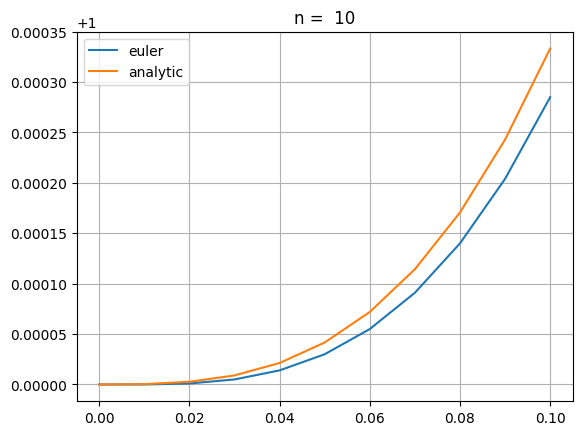

In [81]:
n = [10, 50, 100]
x, y = euler(n=10)
plt.plot(x, y, label='euler')
plt.plot(x, analytic(x), label='analytic')
plt.grid()
plt.legend()
plt.title(f'n =  {n[0]}')


Text(0.5, 1.0, 'n =  50')

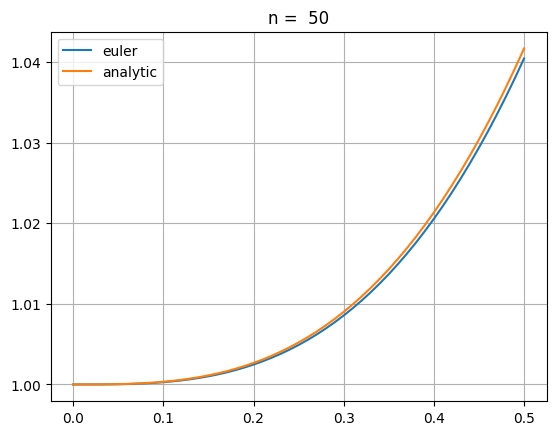

In [82]:
x, y = euler(n=n[1])
plt.plot(x, y, label='euler')
plt.plot(x, analytic(x), label='analytic')
plt.grid()
plt.legend()
plt.title(f'n =  {n[1]}')


Text(0.5, 1.0, 'n =  100')

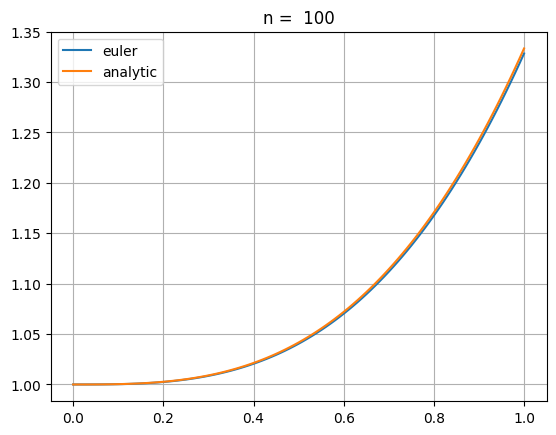

In [83]:
x, y = euler(n=n[2])
plt.plot(x, y, label='euler')
plt.plot(x, analytic(x), label='analytic')
plt.grid()
plt.legend()
plt.title(f'n =  {n[2]}')


In [84]:
# 2

def test_ode():
    def system(t, y):
        y1, y2 = y
        dydt1 = y2
        dydt2 = -2 * y2 - 10 * y1 + np.sin(t)
        return [dydt1, dydt2]

    t = [0, 15]
    y0 = [1, 0]
    s = solve_ivp(system, t, y0, method='RK45')
    return s

s = test_ode()

In [10]:
print('Solution\n', s.y[0], '\n') 
print('Derivative of a solution\n', s.y[1]) 

Solution
 [ 1.          0.99999995  0.99999397  0.99938999  0.9435136   0.4047027
 -0.12182293 -0.28049252 -0.15376543  0.07159966  0.20578615  0.21944832
  0.14442605  0.03557144 -0.02074267 -0.03740596 -0.04195322 -0.0519754
 -0.07344414 -0.1021761  -0.11205121 -0.10617715 -0.08680328 -0.05068822
 -0.00154022  0.05264945  0.08604706  0.10396142  0.10857063  0.10260018
  0.08565258  0.05467146  0.01098463 -0.04102099 -0.07869467 -0.10054659
 -0.10829878 -0.10453013 -0.09063469 -0.06296557 -0.0221678   0.02850971
  0.07333093  0.09781276  0.10781414  0.10653357  0.09612537  0.08673847] 

Derivative of a solution
 [ 0.00000000e+00 -9.98896199e-04 -1.09763186e-02 -1.09585014e-01
 -9.69377088e-01 -2.02367909e+00 -1.16799181e+00  7.86260199e-03
  7.19423200e-01  6.83374268e-01  2.79660685e-01 -1.57954125e-01
 -3.29388165e-01 -2.53347264e-01 -1.00659206e-01 -1.87211261e-02
 -2.34832374e-02 -5.53318208e-02 -8.02314254e-02 -5.59874804e-02
 -6.67248402e-03  4.35768643e-02  7.95515961e-02  1.01

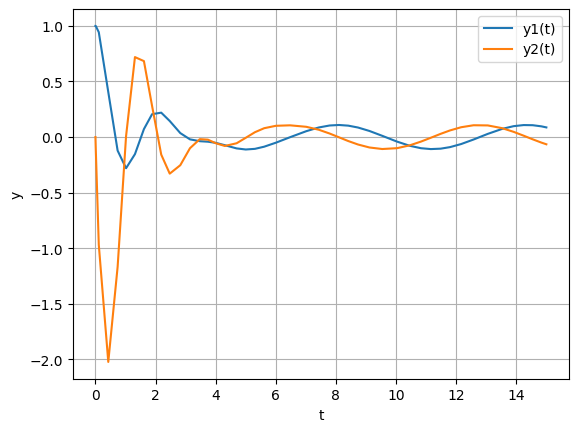

In [11]:
plt.plot(s.t, s.y[0], label='y1(t)')
plt.plot(s.t, s.y[1], label='y2(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [15]:
# 3

def y(t):
    C1, C2 = 87 / 85, 26 / 85
    return np.exp(-t) * (C1 * np.cos(3*t) + C2 * np.sin(3*t)) + (1/85) * (9 * np.sin(t) - 2 * np.cos(t))

def system(t, y):
        y1, y2 = y
        dydt1 = y2
        dydt2 = -2 * y2 - 10 * y1 + np.sin(t)
        return [dydt1, dydt2]

rk23 = solve_ivp(system, [0, 10], [1, 0], method='RK23')
rk45 = solve_ivp(system, [0, 10], [1, 0], method='RK45')
rk23

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  9.990e-05 ...  9.840e+00  1.000e+01]
        y: [[ 1.000e+00  1.000e+00 ... -2.100e-02 -3.772e-02]
            [ 0.000e+00 -9.989e-04 ... -1.065e-01 -1.020e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 257
     njev: 0
      nlu: 0

In [17]:
rk45

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  9.990e-05 ...  9.541e+00  1.000e+01]
        y: [[ 1.000e+00  1.000e+00 ...  1.098e-02 -3.785e-02]
            [ 0.000e+00 -9.989e-04 ... -1.078e-01 -1.015e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 230
     njev: 0
      nlu: 0

Text(0.5, 1.0, 'ODE23')

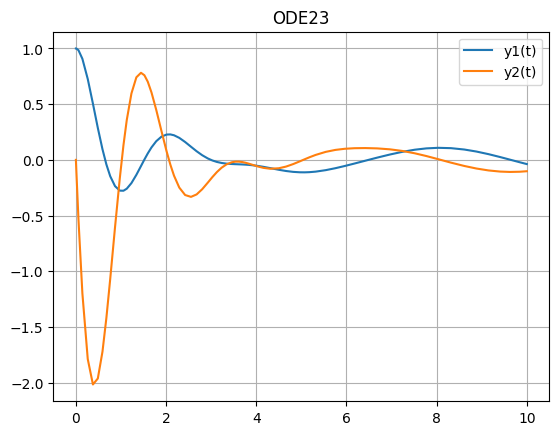

In [30]:
plt.plot(rk23.t, rk23.y[0], label='y1(t)')
plt.plot(rk23.t, rk23.y[1], label='y2(t)')
plt.grid()
plt.legend()
plt.title('ODE23')

Text(0.5, 1.0, 'ODE23 & analytical')

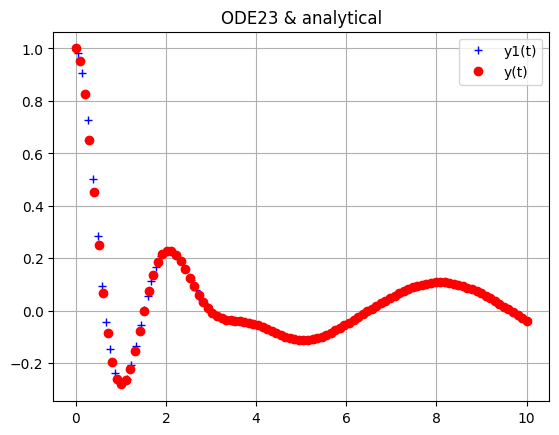

In [41]:
x = np.linspace(0, 10, 100)
plt.plot(rk23.t, rk23.y[0], 'b+', label='y1(t)')
plt.plot(x, y(x), 'ro', label='y(t)')
plt.grid()
plt.legend()
plt.title('ODE23 & analytical')

Text(0.5, 1.0, 'ODE45')

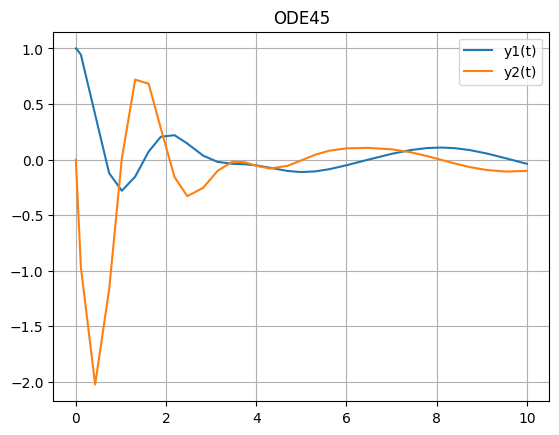

In [47]:
plt.plot(rk45.t, rk45.y[0], label='y1(t)')
plt.plot(rk45.t, rk45.y[1], label='y2(t)')
plt.grid()
plt.legend()
plt.title('ODE45')

Text(0.5, 1.0, 'ODE45 & analytical')

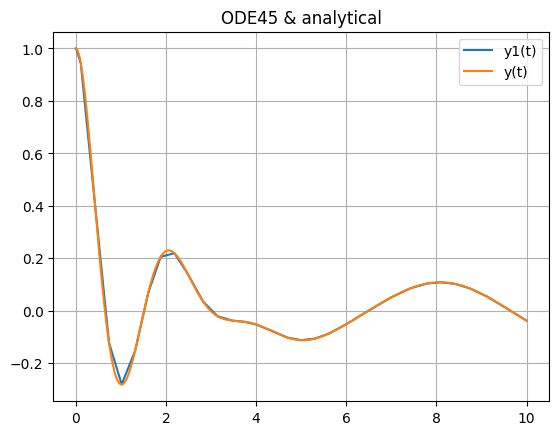

In [48]:
x = np.linspace(0, 10, 1000)
plt.plot(rk45.t, rk45.y[0], label='y1(t)')
plt.plot(x, y(x), label='y(t)')
plt.grid()
plt.legend()
plt.title('ODE45 & analytical')

In [86]:
# 4

def system(t, y):
    return [y[1], -1 / t**2]

y, t = [np.log(0.01), 100], [0.01, 1]

s = solve_ivp(system, t, y, method='RK23')
s

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e-02  1.090e-02 ...  9.968e-01  1.000e+00]
        y: [[-4.605e+00 -4.519e+00 ... -4.422e-02 -4.111e-02]
            [ 1.000e+02  9.178e+01 ...  9.601e-01  9.568e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 86
     njev: 0
      nlu: 0

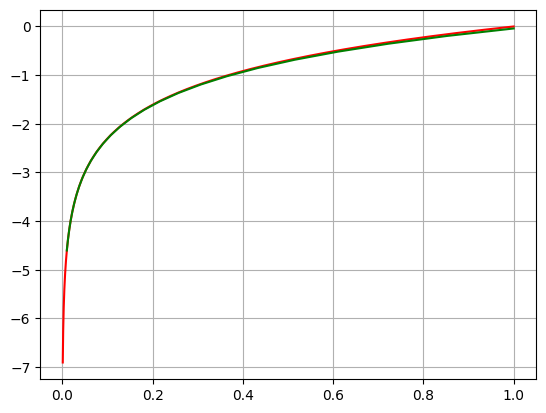

In [87]:
x = np.linspace(0.001, 1, 10000)
plt.plot(x, np.log(x), 'r')
plt.plot(s.t, s.y[0], 'g')
plt.grid()